# Pandas Practice Pt 2

<u><b>Agenda</b></u>

Today we will continue to practice and familiarize ourselves with data manipulation using the Pandas Python package.

To demonstrate merging datasets with pandas, we will import data for the [1896-2014 Summer Olympic Games](https://www.kaggle.com/the-guardian/olympic-games) and use the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) & [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) methods to answer some question about the data. 

Then we will import county level COVID-19 data. For this dataset, students will be split into breakout rooms and given tasks to complete using a pair programming styled collaboration. 

<u>Our first step is to import the packages we will need for this lesson:</u>

In [2]:
# Data Manipulation
import pandas as pd

# Edit import path so 
# custom functions can be imported
import sys
sys.path.append('../../')
import os

# Custom functions used for visualization
from src import helpers

# Plotting libraries
import matplotlib.pyplot as plt

In [3]:
data_path = os.path.join(os.pardir, os.pardir, 'data')
path = os.path.join(data_path, 'olympics_join_table.csv')
join_table = pd.read_csv(path)
join_table.head()

,location_id,event_id,athlete_id,result_id
0,0,0,0,0
1,0,0,1,1
2,0,1,2,2
3,0,1,3,0
4,0,1,4,1


This table, on its own, is not very useful. The ids in this table reference data in other tables and can be used for merging datasets.

**Below is a visualization of how these data are structured.**

![Schema of olympics dataset](../../static/olympics_schema.png)

The idea is that we can use this join table merge all of the connecting tables into a single dataset!

<u>Below, we import the `locations`, `events`, `athletes`, and `results` tables.</u>

In [4]:
locations = pd.read_csv(os.path.join(data_path, 'olympics_locations.csv'))
events = pd.read_csv(os.path.join(data_path, 'olympics_events.csv'))
athletes = pd.read_csv(os.path.join(data_path,'olympics_athletes.csv'))
results = pd.read_csv(os.path.join(data_path, 'olympics_results.csv'))
dataframes = [locations.head(3), events.head(3), athletes.head(3), results.head(3)]
names=['locations', 'events','athletes', 'results']
helpers.side_by_side(dataframes, names)

locations events athletes results 
 
 
 
 location_id 
 Year 
 City 
 
 
 
 
 0 
 0 
 1896 
 Athens 
 
 
 1 
 1 
 1900 
 Paris 
 
 
 2 
 2 
 1904 
 St Louis 
 
 
 
 
 
 
 event_id 
 Sport 
 Discipline 
 Event 
 
 
 
 
 0 
 0 
 Aquatics 
 Swimming 
 100M Freestyle 
 
 
 1 
 1 
 Aquatics 
 Swimming 
 100M Freestyle For Sailors 
 
 
 2 
 2 
 Aquatics 
 Swimming 
 1200M Freestyle 
 
 
 
 
 
 
 athlete_id 
 Athlete 
 Country 
 Gender 
 
 
 
 
 0 
 0 
 HAJOS, Alfred 
 HUN 
 Men 
 
 
 1 
 1 
 HERSCHMANN, Otto 
 AUT 
 Men 
 
 
 2 
 2 
 DRIVAS, Dimitrios 
 GRE 
 Men 
 
 
 
 
 
 
 result_id 
 Medal 
 
 
 
 
 0 
 0 
 Gold 
 
 
 1 
 1 
 Silver 
 
 
 2 
 2 
 Bronze

### Task 1

- Using the join table, merge all of the olympics datasets into a single table. 
- Save the merged table as the variable `olympics`.
- Drop the id columns

In [5]:
# Your code here

olympic = join_table.merge(locations, on = 'location_id')\
.merge(events, on = 'event_id')\
.merge(athletes, on = 'athlete_id')\
.merge(results, on = 'result_id')\
.drop(['location_id', 'event_id', 'athlete_id', 'result_id'], axis = 1) #axis equals one because we're dropping a column


### Task 2

Using the `.groupby` method, create a dataframe called `number_of_medals` that counts the number of gold, silver, and bronze medals each country earned for a given year. 

The dataframe should look like this:

|  | Country|Year|Medal|Count|
|--|--------|----|-----|-----|
|0 | AFG|2008|Bronze|1|
|1|AFG|2012|Bronze|1|
|2|AHO|1988|Silver|1|

In [14]:
# Your code here

number_of_medals = olympic.groupby(['Country','Year','Medal']).count().reset_index() #restindex removes multi-index
number_of_medals = number_of_medals.drop(['Sport', 'Discipline', 'Event', 'Athlete', 'Gender'], axis=1)
number_of_medals.rename({'City': 'Count'}, axis=1, inplace=True)

#groupby aggregates based on a shared quality, tell pandas how we want to combine it (sum, average) aka what we'd like to do with it

In [15]:
number_of_medals.head()

,Country,Year,Medal,Count
0,AFG,2008,Bronze,1
1,AFG,2012,Bronze,1
2,AHO,1988,Silver,1
3,ALG,1984,Bronze,2
4,ALG,1992,Bronze,1


Let's calculate the average number medals each country tends to earn. Let's take a look at the distribution of number of medals earned for all counties so we can idenify which calculation is best suited for observing the average for these data. 

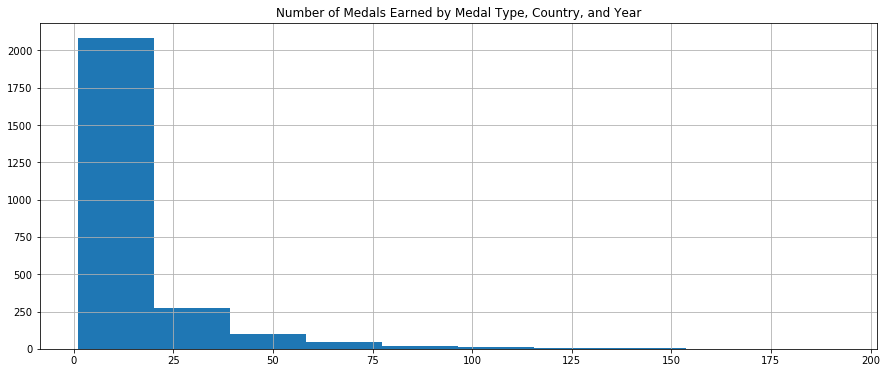

In [16]:
number_of_medals['Count'].hist(figsize=(15,6));
plt.title('Number of Medals Earned by Medal Type, Country, and Year')
plt.show()

Based on this visualization, it doesn't make sense to use the mean for these data. It looks like there are a few years certain countries earned an unusually high number of medals. To avoid these outliers overly impacting the average, we will calculate the median instead. 

### Task 4

In the cell(s) below, using groupby to calculate the median number of medals a country earns across all years and sort in descending order to return the 5 countries with the highest median Gold Medal Count.

The dataframe should look like this:

|  | Country|Medal|Count|
|--|--------|----|-----|
|101| EUN|Gold|92.0|
|327|AFG|Gold|78.5|
|117|AHO|Gold|75.0|

In [19]:
# Your code here


median_medals = number_of_medals.groupby(['Country', 'Medal']).median().reset_index()
median_medals = median_medals.drop(['Year'], axis=1)
median_medals[median_medals.Medal == 'Gold'].sort_values('Count',ascending=False).head(5)

,Country,Medal,Count
101,EUN,Gold,92.0
327,USA,Gold,78.5
117,GDR,Gold,75.0
321,URS,Gold,68.0
259,RUS,Gold,47.0


### Task 4

Create a pivot table to identify which Athlete has the most Gold Medals. 

In [20]:
# Your code here

olympic

,Year,City,Sport,Discipline,Event,Athlete,Country,Gender,Medal
0,1896,Athens,Aquatics,Swimming,100M Freestyle,"HAJOS, Alfred",HUN,Men,Gold
1,1896,Athens,Aquatics,Swimming,1200M Freestyle,"HAJOS, Alfred",HUN,Men,Gold
2,1904,St Louis,Aquatics,Swimming,100M Freestyle,"HALMAY, Zoltan",HUN,Men,Gold
3,1904,St Louis,Aquatics,Swimming,50Y Freestyle (45.72M),"HALMAY, Zoltan",HUN,Men,Gold
4,1908,London,Aquatics,Swimming,100M Freestyle,"DANIELS, Charles",USA,Men,Gold
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Wg 74 KG,"KAZAKEVIC, Aleksandr",LTU,Men,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,Wg 84 KG,"GAJIYEV, Danyal",KAZ,Men,Bronze
31162,2012,London,Wrestling,Wrestling Freestyle,Wg 84 KG,"JANIKOWSKI, Damian",POL,Men,Bronze
31163,2012,London,Wrestling,Wrestling Freestyle,Wg 96 KG,"ALEKSANYAN, Artur",ARM,Men,Bronze


# Breakout Room Tasks

Below we import two datasets:
1. The New York Times COVID-19 County Dataset from the [Nytimes Github](https://github.com/nytimes/covid-19-data). 
    - This dataset is updated daily with cases and death figures, at the county level, for every county in the United States and offers a rare micro level view of the pandemic. 
    - This dataset is saved with the variable `df`.

2. County Population Data from the 2019 Census.
    - This dataset is saved with the variable `pop`.

Please complete the below tasks with your group.

In [ ]:
# Import Datasets
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
pop = pd.read_csv(os.path.join(data_path, 'us-county-2019-population.csv'))
helpers.side_by_side([df.head(2), pop.head(2)], ['Nytimes Dataset', 'Population Dataset'])

### Task 5
1. Drop nulls values for the fips column in the nytimes dataset

In [ ]:
# Your code here

### Task 6
"fips" are used for encoding geographic regions. For our purposes, fips can serve as our join key. 

<u>In the cell below</u> 

- Create a `'fips'` columns for the population dataset by merging the `'state'` and `'county'` columns.

Example:

If the state value is 35 and the county value is 100, the resulting fip code will be 35100.

### Take note!
> All fip county codes for this lesson need to be a 5 digit number. If a county code is less than 100, a 0 will need to be added to the beginning of the county code. If a county code is less than 10, two zeroes will need to be added to the begining of the county code. 

Example:

If the state code is 35 and the county code is 23, the resulting fip code will be 35023.

If the state code is 35 and the county code is 9, the resulting fip code will 35009.

In [ ]:
# Your code here

### Task 7

<u>In the cell below</u>
- Merge the nytimes covid dataset and the population dataset.

#### Hint

Make sure the datatypes of your join columns match!

In [ ]:
# Your code here

### Task 8

Some population values have been randomly replaced with -9999.

In [ ]:
il = df[df.state == 'Illinois']

il_counties = il.drop_duplicates(subset=['county'])

il_counties[il_counties['pop'] < 75000]['pop'].hist()

plt.title('Distribution of Illinois County Population')
plt.show()

Please replace these values with the average.

In [ ]:
# Your code here

### Task 9

<u>In the cell below, create a `'cases_percapita'` column using the '`cases'` and `'pop'` columns.</u>

In [ ]:
# Your code here

### Task 10

Using the `.groupby` method, create a dataframe called `'state'` that calulates the total number of cases for a given state.

In [ ]:
# Your code here

### Task 11

Using the `.groupby` method, create a new dataframe called `state_bi_weekly` that calculates the total number of cases within the state for a 2 week period.

**Hint**

You will first need change the date column to a datetime datatype and set the date column as the index.

This can be done with 

```df.index = pd.to_datetime(df.date)```

> When using groupby with a datetime index you can use [pd.grouper](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html)

> Set the `freq` argument for `pd.Grouper` to `'SM'`.

In [ ]:
# Your code here

### Task 12

Please identify the names of the states that the top 5 lines in the below line chart represent. 

In [ ]:
state_bi_weekly.index = pd.to_datetime(state_bi_weekly.date)
state_bi_weekly.pivot(columns = 'state', values='cases').iloc[:-1].plot(legend = False, figsize=(10,8))
plt.title('Bi Weekly Cases by State')
plt.show()

In [ ]:
# Your code here